## Hypothesentests für den Mittelwert einer Grundgesamtheit
----------------------------------------

Die einfachste Form eines Hypothesentests ist der **Test auf einen Grundgesamtheitsmittelwert**. Bei diesem Test vergleichen wir den aus der Stichprobe (Beobachtungen) gewonnenen Mittelwert $\mu$ mit einem angenommenen Grundgesamtheitsmittelwert $\mu_0$. Die Nullhypothese besagt, dass der Mittelwert und der Mittelwert der Grundgesamtheit gleich sind, und wird daher wie folgt geschrieben

$$H_0: \mu = \mu_0\text{.}$$

Weichen die beobachteten Daten ($\mu$) signifikant vom angenommenen Mittelwert der Grundgesamtheit ($\mu_0$) ab, dann wird die Annahme $H_0$ zugunsten der Alternativhypothese $H_A$ verworfen. Je nach der spezifischen Forschungsfrage wird die Alternativhypothese $H_A$ wie folgt formuliert

$$H_A: \mu < \mu_0 \quad \text{oder} \quad  \mu > \mu_0 \quad \text{oder} \quad \mu \ne \mu_0 \text{.}$$

Wenn die Daten jedoch nicht genügend Beweise liefern, um die angegebene Hypothese ($H_0$) zu verwerfen, verwerfen wir $H_0$ nicht und schließen, dass die Daten nicht genügend Beweise liefern, um anzunehmen, dass sich der beobachtete Mittelwert $\mu$ vom angenommenen Grundgesamtheitsmittelwert ($\mu_0$) unterscheidet. Die beobachtete Variabilität in den Daten wird auf die inhärent probabilistische Natur des Datenerzeugungsprozesses zurückgeführt, oder mit anderen Worten, die beobachtete Variabilität in den Daten ist auf den Zufall zurückzuführen.

In den nächsten Abschnitten wird gezeigt, dass für die eigentliche Berechnung der statistischen Signifikanz unser Wissen über die Grundgesamtheitsparameter von Bedeutung ist.

In [2]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py

ModuleNotFoundError: No module named 'lab_black'

## Hypothesentests für einen Grundgesamtheitsmittelwert bei bekannter Standardabweichung
----------------------------------------

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import pandas as pd
from random import sample

Wenn die Standardabweichung ($\sigma$) der Grundgesamtheit bekannt ist, wird ein Hypothesentest, der für einen Mittelwert der Grundgesamtheit durchgeführt wird, als **$z$-Test für einen Mittelwert** oder einfach als **$z$-Test** bezeichnet.

Ein $z$-Test ist ein Hypothesentest zum Testen eines Mittelwerts der Grundgesamtheit, $\mu$, gegen einen angenommenen Mittelwert der Grundgesamtheit,$\mu_0$. Der $z$-Test setzt normalverteilte Variablen oder einen großen Stichprobenumfang voraus; dann garantiert der <a href="https://de.wikipedia.org/wiki/Zentraler_Grenzwertsatz">zentrale Grenzwertsatz</a> eine normalverteilte <a href="https://de.wikipedia.org/wiki/Sch%C3%A4tzfunktion">Stichprobenverteilung</a>. Darüber hinaus muss $\sigma$, die Standardabweichung der Grundgesamtheit, bekannt sein. In der Praxis ist diese Annahme fast nie erfüllt, so dass der $z$-Test nur selten angewendet wird. Er ist jedoch der einfachste Hypothesentest und daher ein guter Einstieg in das Thema.

Zur Durchführung des $z$-Tests gehen wir schrittweise vor, wie in der folgenden Tabelle dargestellt. Zunächst wird der **Ansatz des kritischen Werts** dargestellt, dann wird in einem zweiten Schritt die Analyse für den **Ansatz des $p$-Werts** wiederholt.

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4a} & \text{Ansatz des kritischen Wertes: Bestimmung des kritischen Wertes.}
\\
\ \text{Schritt 4b} &\text{P-Wert-Ansatz: Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5a} & \text{Ansatz des kritischen Werts: Wenn der Wert der Teststatistik in den Ablehnungsbereich fällt, ist } H_0 \text{ abzulehnen}   \text{; ansonsten } H_0 \text{ nicht ablehnen}  \text{.}
\\
\ \text{Schritt 5b} & \text{P-Wert-Ansatz: Wenn }p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

### $z$-Test mit einem Mittelwert: Ein Beispiel

In diesem Abschnitt arbeiten wir mit dem `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen geeigneten Namen.

In [8]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, Name, Geschlecht, Alter, Größe, Gewicht, Religion, nc.score, Semester, Hauptfach, Nebenfach, score1, score2, online.tutorial, graduated, salary*.

Zur Veranschaulichung der Hypothesentests untersuchen wir das Durchschnittsgewicht der Studenten und vergleichen es mit dem Durchschnittsgewicht der erwachsenen Europäer. <a href="https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-12-439">Walpole et al. (2012)</a> veröffentlichten Daten über das durchschnittliche Körpergewicht (kg) pro Region, einschließlich Europa. Sie geben die durchschnittliche Körpermasse für die europäische erwachsene Bevölkerung mit $70,8$ kg an. Wir setzen $\mu_0$, den Mittelwert der Bevölkerung, entsprechend fest, $\mu_0=70,8$. Aufgrund des methodischen Ansatzes von {cite:t}`Walpole2012` haben sie leider keine Standardabweichung ($\sigma$) der Gewichte europäischer Erwachsener angegeben. Zu Demonstrationszwecken gehen wir davon aus, dass die Gewichtsdaten aus dem Studentendatensatz eine gute Näherung für die interessierende Population darstellen. Daher setzen wir $\sigma$ auf die Standardabweichung der Gewichtsvariablen im `students` Datensatz.

In [30]:
mu0 = 70.8
sigma_z = np.std(students.weight)
sigma_z

8.634637630634796

Außerdem nehmen wir eine Zufallsstichprobe mit einem Stichprobenumfang von $n=14$. Die Stichprobe besteht aus den Gewichten in kg von $14$ zufällig ausgewählten Studenten aus dem Studentendatensatz. Schließlich berechnen wir den Stichprobenmittelwert ($\bar{x}$), die Stichprobenstatistik unseres Interesses. Die Stichprobenstatistik wird der Variablen `x_bar` zugewiesen.

In [31]:
n = 14
x_weight = students.weight.sample(n, random_state=4)
x_bar = np.mean(x_weight)
x_bar

77.02857142857144

### Hypothesentests: Der Ansatz des kritischen Werts

**Schritt 1: Geben Sie die Nullhypothese ($H_0$) und die Alternativhypothese ($H_A$) an.**

Die Nullhypothese besagt, dass das Durchschnittsgewicht der Studenten ($\mu$) gleich dem Durchschnittsgewicht europäischer Erwachsener von $70,8$ kg ($\mu_0$) ist, wie von Walpole et al. (2012) berichtet. Mit anderen Worten: Es gibt keinen Unterschied zwischen dem Durchschnittsgewicht der Studenten und dem Durchschnittsgewicht der europäischen Erwachsenen.

$$H_0: \quad \mu = 70,8$$

Zur Veranschaulichung testen wir drei Alternativhypothesen.

**Alternativhypothese 1**: Das Durchschnittsgewicht der Studenten entspricht nicht dem Durchschnittsgewicht der europäischen Erwachsenen. Mit anderen Worten: Es gibt einen Unterschied zwischen dem Durchschnittsgewicht der Studenten und dem Durchschnittsgewicht der europäischen Erwachsenen. 

$$H_{A_1}: \quad \mu \ne 70,8$$

**Alternativhypothese 2**: Das Durchschnittsgewicht der Studenten ist geringer als das Durchschnittsgewicht der europäischen Erwachsenen.

$$H_{A_2}: \quad \mu  < 70,8$$

**Alternativhypothese 3**: Das Durchschnittsgewicht der Studenten ist höher als das Durchschnittsgewicht der europäischen Erwachsenen.

$$H_{A_3}: \quad \mu > 70,8$$

**Schritt 2: Legen Sie das Signifikanzniveau $\alpha$ fest.**

$$\alpha = 0,05$$

In [32]:
alpha = 0.05

**Schritt 3: Berechnen Sie den Wert der Teststatistik.**

Die folgende Gleichung wird zur Berechnung der Teststatistik $z$ verwendet.

$$z = \frac{\bar x-\mu_0}{\sigma/\sqrt{n}}$$

- Berechnen Sie den Wert der Teststatistik

$$z = \frac{\bar x-\mu_0}{\sigma/\sqrt{n}} =  \frac{77,02-70,8}{8,64/ \sqrt{14}} \approx 2,699$$

In [33]:
z = (x_bar - mu0) / sigma_z * np.sqrt(n)
z

2.699033971278552

**Schritt 4a: Bestimmen Sie den kritischen Wert.**

Um den kritischen Wert zu berechnen, wenden wir die Funktion `norm.ppf()` in Python an. Es sei daran erinnert, dass wir auf drei Alternativhypothesen ($H_{A_1}, H_ {A_2}$ und $H_{A_3}$) testen und daher auch drei kritische Werte berechnen müssen ($z_{A_1} = \pm z_{\alpha/2}, z_{A_2} = -z_\alpha$ und $z_{A_3} = +z_\alpha$).

In [34]:
z_HA_1 = norm.ppf(1 - alpha / 2)
z_HA_2 = norm.ppf(1 - (1 - alpha))
z_HA_3 = norm.ppf(1 - alpha)

In [35]:
print(f"z HA 1:  {z_HA_1}")
print(f"z HA 2:  {z_HA_2}")
print(f"z HA 2:  {z_HA_3}")

z HA 1:  1.959963984540054
z HA 2:  -1.6448536269514722
z HA 2:  1.6448536269514722


Die kritischen Werte sind $z_{A_1} \approx \pm 1,96$, $ z_{A_2} \approx-1,64$ und  $ z_{A_3} \approx 1,64$.

**Schritt 5a: Wenn der Wert der Teststatistik in den Verwerfungsbereich fällt, ist $H_0$ zu verwerfen; andernfalls ist $H_0$ nicht zu verwerfen.**

Der Wert der in Schritt $3$ ermittelten Teststatistik ist $z \approx 2,699$. Es sei daran erinnert, dass wir drei Alternativhypothesen ($H_{A_1}, H_{A_2}$ und $H_{A_3}$) untersuchen. Daher bewerten wir den Ablehnungsbereich für jede einzelne Hypothese.

- **Alternativhypothese** $H_{A_1}:\quad \mu \ne 70,8$

Erinnern Sie sich an die kritischen Werte für $H_{A_1}$. 

$$z_{A_1} = \pm z_{\alpha/2} = \pm 1,96$$

Fällt die Teststatistik ($z \approx 2,699$) in den Ablehnungsbereich? Beachten Sie, dass es sich um einen zweiseitigen Test handelt, d. h. wir werten die obere und die untere Grenze aus.

- Obere Grenze

$$2,699 \gt 1,96$$

In [36]:
# Obere Grenze
# Ablehnen?
print(z > abs(z_HA_1))

True


- Untere Grenze

$$ 2,699 \lt -1,96$$

In [37]:
# Untere Grenze
# Ablehnen?
print(z < -abs(z_HA_1))

False


(-0.05, 0.5)

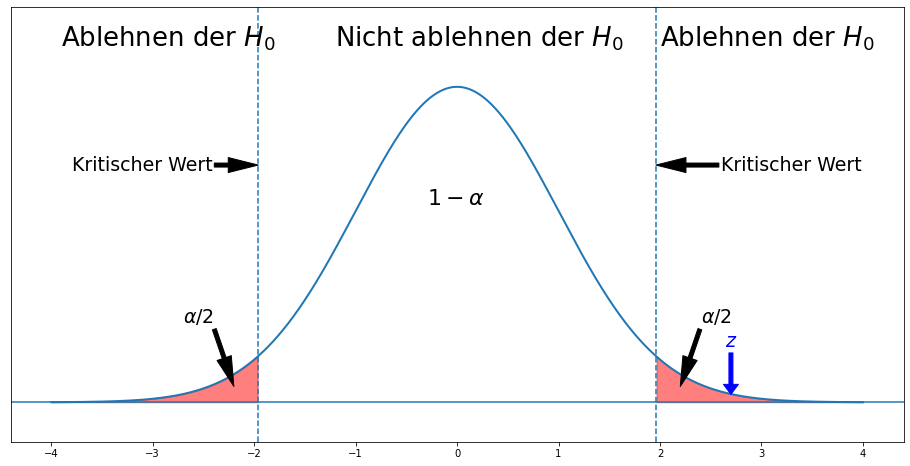

In [38]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
x_min = -4
x_max = 4
x = np.linspace(x_min, x_max, 1000)

mu = 0
sigma = 1
ax.plot(x, norm.pdf(x), color="C0", linewidth=2)


ticks = [-z_HA_1, z_HA_1]
for _x in ticks:
    ax.axvline(_x, linestyle="dashed")

ax.axhline(0)
# ax.axis("off")
ax.set_yticks([])

ax.fill_between(x, norm.pdf(x), where=x <= ticks[0], color="r", alpha=0.5)
ax.fill_between(x, norm.pdf(x), where=x >= ticks[1], color="r", alpha=0.5)


ax.text(s="Ablehnen der $H_0$", x=-3.9, y=0.45, size=26)
ax.text(s="Ablehnen der $H_0$", x=2, y=0.45, size=26)
ax.text(s="Nicht ablehnen der $H_0$", x=-1.2, y=0.45, size=26)

ax.text(s=r"$1-\alpha$", x=-0.3, y=0.25, size=22)


ax.annotate(
    r"$\alpha/2$",
    xy=(2.2, 0.02),
    xytext=(2.4, 0.1),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=19,
)

ax.annotate(
    r"$\alpha/2$",
    xy=(-2.2, 0.02),
    xytext=(-2.7, 0.1),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=19,
)

ax.annotate(
    r"Kritischer Wert",
    xy=(ticks[1], 0.3),
    xytext=(2.6, 0.3),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=19,
    verticalalignment="center",
)

ax.annotate(
    r"Kritischer Wert",
    xy=(ticks[0], 0.3),
    xytext=(-3.8, 0.3),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=19,
    verticalalignment="center",
)

ax.annotate(
    r"$z$",
    xy=(z, 0.01),
    xytext=(z, 0.07),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=10, width=4, color="blue"),
    size=19,
    color="blue",
    horizontalalignment="center",
)


ax.set_ylim(-0.05, 0.5)

Aufgrund der numerischen und grafischen Auswertung fällt der Wert in den Verwerfungsbereich, so dass wir $H_0$ verwerfen. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant.

- **Alternativhypothese** $H_{A_2}:\quad \mu \lt 70,8$

Erinnern Sie sich an den kritischen Wert für $H_{A_2}$. 

$$z_{A_2} = -z_{\alpha} = -1,64$$

Fällt die Teststatistik ($z \approx 2,699$) in den Ablehnungsbereich?

$$2,699 < -1,64$$

In [39]:
# Ablehnen?
print(z < z_HA_2)

False


(-0.05, 0.5)

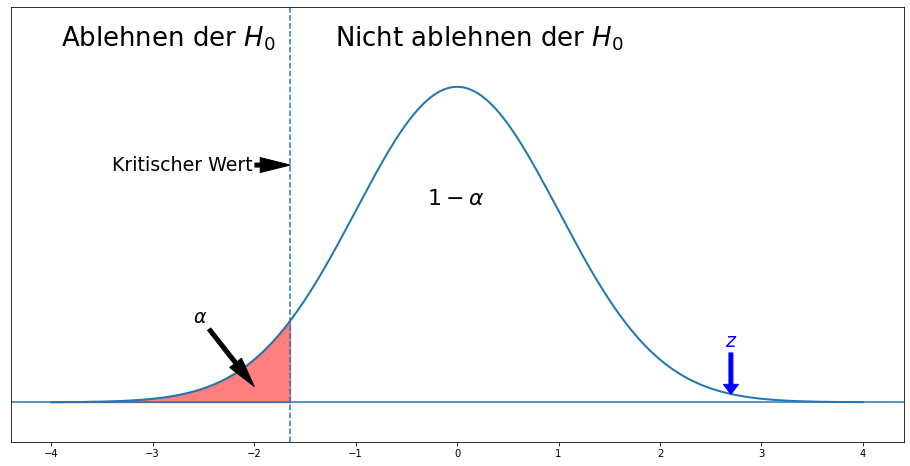

In [40]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
x_min = -4
x_max = 4
x = np.linspace(x_min, x_max, 1000)

mu = 0
sigma = 1
ax.plot(x, norm.pdf(x), color="C0", linewidth=2)


ticks = [z_HA_2]
for _x in ticks:
    ax.axvline(_x, linestyle="dashed")

ax.axhline(0)
ax.set_yticks([])

ax.fill_between(x, norm.pdf(x), where=x <= ticks[0], color="r", alpha=0.5)

ax.text(s="Ablehnen der $H_0$", x=-3.9, y=0.45, size=26)
ax.text(s="Nicht ablehnen der $H_0$", x=-1.2, y=0.45, size=26)

ax.text(s=r"$1-\alpha$", x=-0.3, y=0.25, size=22)


ax.annotate(
    r"$\alpha$",
    xy=(-2, 0.02),
    xytext=(-2.6, 0.1),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=19,
)


ax.annotate(
    r"Kritischer Wert",
    xy=(ticks[0], 0.3),
    xytext=(-3.4, 0.3),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=19,
    verticalalignment="center",
)

ax.annotate(
    r"$z$",
    xy=(z, 0.01),
    xytext=(z, 0.07),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=10, width=4, color="blue"),
    size=19,
    color="blue",
    horizontalalignment="center",
)

ax.set_ylim(-0.05, 0.5)

Aufgrund der numerischen und grafischen Auswertung fällt der Wert nicht in den Verwerfungsbereich, so dass wir $H_0$ nicht verwerfen. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant.

- **Alternativhypothese** $H_{A_3}:\quad \mu > 70,8$

Erinnern Sie sich an den kritischen Wert für $H_{A_3}$.

$$z_{A_3} = +z_{\alpha} = 1,64$$

Fällt die Teststatistik ($z \approx 2,699$) in den Ablehnungsbereich?

$$2,699 > 1,64$$

In [41]:
# Ablehnen?
print(z > z_HA_3)

True


(-0.05, 0.5)

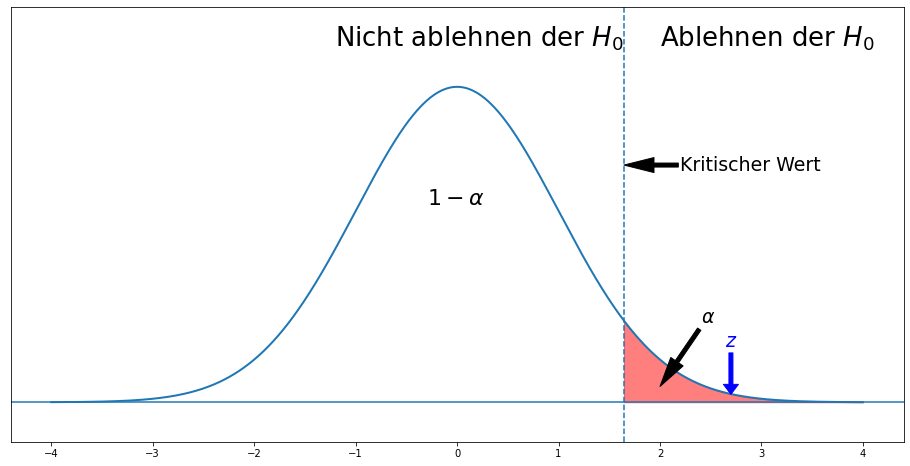

In [42]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 8))
x_min = -4
x_max = 4
x = np.linspace(x_min, x_max, 1000)

mu = 0
sigma = 1
ax.plot(x, norm.pdf(x), color="C0", linewidth=2)


ticks = [z_HA_3]
for _x in ticks:
    ax.axvline(_x, linestyle="dashed")

ax.axhline(0)
ax.set_yticks([])

ax.fill_between(x, norm.pdf(x), where=x >= ticks[0], color="r", alpha=0.5)

ax.text(s="Ablehnen der $H_0$", x=2, y=0.45, size=26)
ax.text(s="Nicht ablehnen der $H_0$", x=-1.2, y=0.45, size=26)

ax.text(s=r"$1-\alpha$", x=-0.3, y=0.25, size=22)

ax.annotate(
    r"$\alpha$",
    xy=(2, 0.02),
    xytext=(2.4, 0.1),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=19,
)

ax.annotate(
    r"Kritischer Wert",
    xy=(ticks[0], 0.3),
    xytext=(2.2, 0.3),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=19,
    verticalalignment="center",
)

ax.annotate(
    r"$z$",
    xy=(z, 0.01),
    xytext=(z, 0.07),
    # textcoords="data",
    arrowprops=dict(headwidth=15, headlength=10, width=4, color="blue"),
    size=19,
    color="blue",
    horizontalalignment="center",
)


ax.set_ylim(-0.05, 0.5)

Aufgrund der numerischen und grafischen Auswertung fällt der Wert in den Verwerfungsbereich, so dass wir $H_0$ verwerfen. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests.**

- **Alternativhypothese** $H_{A_1}:\quad \mu \ne 70,8$

Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass sich das Durchschnittsgewicht der Studenten vom Durchschnittsgewicht der europäischen Erwachsenen unterscheidet.

- **Alternativhypothese** $H_{A_2}:\quad \mu \lt 70,8$

Bei einem Signifikanzniveau von $5 \%$ liefern die Daten keine ausreichenden Beweise für die Schlussfolgerung, dass das Durchschnittsgewicht der Studenten geringer ist als das Durchschnittsgewicht der europäischen Erwachsenen

- **Alternativhypothese** $H_{A_3}:\quad \mu > 70,8$

Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass sich das Durchschnittsgewicht der Studenten vom Durchschnittsgewicht der europäischen Erwachsenen unterscheidet.

### Hypothesentests: Der $p$-Wert-Ansatz

**Schritt 1: Geben Sie die Nullhypothese ($H_0$) und die Alternativhypothese ($H_A$) an.**

Die Nullhypothese besagt, dass das Durchschnittsgewicht der Studenten ($\mu$
) gleich dem Durchschnittsgewicht europäischer Erwachsener von $70,8$ kg ($\mu_0$) ist, wie von Walpole et al. (2012) berichtet. Mit anderen Worten: Es gibt keinen Unterschied zwischen dem Durchschnittsgewicht der Studenten und dem Durchschnittsgewicht der europäischen Erwachsenen.

$$H_{A_1}: \quad \mu \ne 70,8$$

Zur Veranschaulichung testen wir drei Alternativhypothesen.

**Alternativhypothese 1**: Das Durchschnittsgewicht der Studenten entspricht nicht dem Durchschnittsgewicht der europäischen Erwachsenen. Mit anderen Worten: Es gibt einen Unterschied zwischen dem Durchschnittsgewicht der Studenten und dem Durchschnittsgewicht der europäischen Erwachsenen. 

$$H_{A_1}: \quad \mu \ne 70,8$$

**Alternativhypothese 2**: Das Durchschnittsgewicht der Studenten ist geringer als das Durchschnittsgewicht der europäischen Erwachsenen.

$$H_{A_2}: \quad \mu  < 70,8$$

**Alternativhypothese 3**: Das Durchschnittsgewicht der Studenten ist höher als das Durchschnittsgewicht der europäischen Erwachsenen.

$$H_{A_3}: \quad \mu > 70,8$$

**Schritt 2: Legen Sie das Signifikanzniveau $\alpha$ fest.**

$$\alpha = 0,05$$

In [43]:
alpha = 0.05

**Schritt 3: Berechnen Sie den Wert der Teststatistik.**

Die folgende Gleichung wird zur Berechnung der Teststatistik $z$ verwendet.

$$z = \frac{\bar x-\mu_0}{\sigma/\sqrt{n}}$$

- Berechnen Sie den Wert der Teststatistik

$$z = \frac{\bar x-\mu}{\sigma/\sqrt{n}} =  \frac{77,02-70,8}{8,64/ \sqrt{14}} \approx 2,699$$

In [45]:
z = (x_bar - mu0) / sigma_z * np.sqrt(n)
z

2.699033971278552

**Schritt 4b: Bestimmen Sie den $p$-Wert.**

Um den $p$-Wert zu berechnen, verwenden wir die Funktion `norm.cdf()` in Python. Erinnern Sie sich daran, dass wir auf drei Alternativhypothesen testen ($H_{A_1}, H_{A_1}$ und $H_{A_1}$), daher berechnen wir auch drei $p$-Werte ($(P(z_{A_1})$, $(P(z_{A_2})$ und $(P(z_{A_3})$).

- **Alternativhypothese** $H_{A_1}:\quad \mu \ne 70,8$

In [47]:
# Die Wahrscheinlichkeit, einen z-Wert zu beobachten, der größer oder kleiner ist, wenn die Nullhypothese wahr ist
upper = 1 - norm.cdf(abs(z))
lower = norm.cdf(-abs(z))
p_z_1 = upper + lower
p_z_1

0.0069541077277850295

Aus Schritt $3$ ergibt sich der Wert der Teststatistik $z \approx 2,699$. Der Test ist zweiseitig, d. h. der $p$-Wert ist die Wahrscheinlichkeit, dass ein Wert $z$ in der Größenordnung von $2,699$ oder mehr oder ein Wert $z$ in der Größenordnung von $-2,699$ oder weniger beobachtet wird. Diese Wahrscheinlichkeit beträgt $0,006954$. Also $p \approx 0,007$.

- **Alternativhypothese** $H_{A_2}:\quad \mu \lt 70,8$

In [48]:
# Die Wahrscheinlichkeit, einen z-Wert oder einen kleineren Wert zu beobachten, wenn die Nullhypothese wahr ist
p_z_2 = norm.cdf(z)
p_z_2

0.9965229461361075

Aus Schritt $3$ ergibt sich der Wert der Teststatistik $z \approx 2,699$. Der Test ist linksschief, d. h. der $p$-Wert ist die Wahrscheinlichkeit, einen Wert $z$ von $2,699$ oder weniger zu beobachten. Diese Wahrscheinlichkeit ist ungefähr $1$. $p \approx 1$.

- **Alternativhypothese** $H_{A_3}:\quad \mu > 70,8$

In [49]:
# Die Wahrscheinlichkeit, einen z-Wert oder einen größeren Wert zu beobachten, wenn die Nullhypothese wahr ist
p_z_3 = 1-norm.cdf(z)
p_z_3

0.003477053863892521

Aus Schritt $3$ ergibt sich der Wert der Teststatistik $z=2,699$. Der Test ist rechtsschief, d. h. der $p$-Wert ist die Wahrscheinlichkeit, einen Wert $z$ von $2,699$ oder mehr zu beobachten. Diese Wahrscheinlichkeit ist ungefähr $0,003477$; d.h. $p \approx 0,004$.

**Schritt 5b: Wenn $p \le α$, wird $H_0$ verworfen; andernfalls wird $H_0$ nicht verworfen.**

Der $p$-Wert der in Schritt $4$ ermittelten Teststatistik wird mit dem benutzerdefinierten Signifikanzniveau $\alpha$ von $5 \%$ verglichen. Es sei daran erinnert, dass wir drei Alternativhypothesen ($H_{A_1}, H_{A_2}$ und $H_{A_3}$) untersuchen. Wir führen also Vergleiche für jede einzelne Hypothese durch.

- **Alternativhypothese** $H_{A_1}:\quad \mu \ne 70,8$

$$0,007 \le 0,05$$

In [50]:
# Ablehnen?
p_z_1 <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$ und wir verwerfen $H_0$. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant und liefern einen sehr starken Beweis gegen die Nullhypothese.

- **Alternativhypothese** $H_{A_2}:\quad \mu \lt 70,8$

$$1 \le 0,05$$

In [51]:
# Ablehnen?
p_z_2 <= alpha

False

Der $p$-Wert ist größer als das angegebene Signifikanzniveau von $0,05$ und wir verwerfen $H_0$ nicht. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant und liefern keinen ausreichenden Beweis gegen die Nullhypothese.

- **Alternativhypothese** $H_{A_3}:\quad \mu > 70,8$

$$0,004 \le 0,05$$

In [52]:
# Ablehnen?
p_z_3 <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$ und wir verwerfen $H_0$. Die Testergebnisse sind auf dem $5 \%$-Niveau statistisch signifikant und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests.**

- **Alternativhypothese** $H_{A_1}:\quad \mu \ne 70,8$

$p \approx 0,007$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass sich das Durchschnittsgewicht der Studenten vom Durchschnittsgewicht der europäischen Erwachsenen unterscheidet.

- **Alternativhypothese** $H_{A_2}:\quad \mu \lt 70,8$

$p \approx 1$. Bei einem Signifikanzniveau von $5 \%$ liefern die Daten keine hinreichenden Anhaltspunkte für die Schlussfolgerung, dass das Durchschnittsgewicht der Studenten geringer ist als das Durchschnittsgewicht der europäischen Erwachsenen.

- **Alternativhypothese** $H_{A_3}:\quad \mu > 70,8$

$p \approx 0,004$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass das Durchschnittsgewicht der Studenten höher ist als das Durchschnittsgewicht der europäischen Erwachsenen.

## Hypothesentests für den Mittelwert einer Grundgesamtheit, wenn $\sigma$ unbekannt ist
----------------------------------------

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t, ttest_1samp

Ein Hypothesentest für einen Grundgesamtheitsmittelwert, bei dem die Standardabweichung $\sigma$ der Grundgesamtheit nicht bekannt ist, wird auf die gleiche Weise durchgeführt, wie wenn die Standardabweichung der Grundgesamtheit bekannt ist. Der einzige Unterschied besteht darin, dass die <a href="https://de.wikipedia.org/wiki/Studentsche_t-Verteilung">$t$-Verteilung</a> und nicht die Standardnormalverteilung ($z$-Verteilung) verwendet wird.

Bei einem Test mit der Nullhypothese $H_0:\; \mu = \mu_0$ wird die Teststatistik, $t$, wie folgt berechnet

$$t = \frac{\bar x - \mu_0}{s/\sqrt{n}}$$

Dieses Hypothesentestverfahren wird als **Einstichproben $t$-Test für einen Mittelwert** oder einfach als **$t$-Test** bezeichnet. Es sei daran erinnert, dass Hypothesentests einem schrittweisen Verfahren folgen, das wie folgt zusammengefasst wird 

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4a} & \text{Ansatz des kritischen Wertes: Bestimmung des kritischen Wertes.}
\\
\ \text{Schritt 4b} &\text{P-Wert-Ansatz: Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5a} & \text{Ansatz des kritischen Werts: Wenn der Wert der Teststatistik in den Ablehnungsbereich fällt, ist } H_0 \text{ abzulehnen}   \text{; ansonsten } H_0 \text{ nicht ablehnen}  \text{.}
\\
\ \text{Schritt 5b} & \text{P-Wert-Ansatz: Wenn }p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

Ähnlich wie im vorangegangenen Abschnitt stellen wir zunächst den Ansatz des **kritischen Werts** vor und wiederholen dann in einem zweiten Schritt die Analyse für den **$p$-Wert-Ansatz**. Diesmal verpacken wir jedoch den Ansatz des kritischen Werts in eine selbst erstellte Funktion. Für den $p$-Wert-Ansatz werden wir die leistungsstarke Maschinerie von Python nutzen und die vorhandene Funktion `ttest_1samp()` anwenden.

### Hypothesentests: Der Ansatz des kritischen Werts

Erstellen wir eine Funktion namens `simple_ttest()`. Die Funktion nimmt als Eingangsargumente einen Vektor `x` (Stichprobendaten), `mu0`, das $\mu_0$ entspricht, den Grundgesamtheitsdurchschnitt, gegen den getestet werden soll, das angegebene Signifikanzniveau $\alpha$, bezeichnet als `alpha`, und die Methode des $t$-Tests, `left` oder `right` oder der Standardwert `two-sided`, mit dem Funktionsargument namens `Methode`. Die Ausgabe der Funktion ist ein Boolescher Wert, `TRUE` oder `FALSE`. Wenn `TRUE`, wird $H_0$ abgelehnt, wenn `FALSE`, wird $H_0$ nicht abgelehnt.

In [54]:
def simple_ttest(x, mu0, alpha, method="two-sided"):
    n = len(x)
    xbar = np.mean(x)
    s = np.std(x, ddof=1)
    # Berechne Teststatistik
    tstat = (xbar - mu0) / (s / np.sqrt(n))

    # Berechne kritischer Wert
    df = n - 1
    # für den linksseitigen Test
    if method == "left":
        crit_val = t.ppf(q=alpha, df=df)
        # Werte Ablehnungsbereich aus
        if tstat < crit_val:
            reject = True
        else:
            reject = False
        # für den rechtsseitigen Test
    if method == "right":
        crit_val = t.ppf(q=1 - alpha, df=df)
        # Werte Ablehnungsbereich aus
        if tstat > crit_val:
            reject = True
        else:
            reject = False

    # für den zweiseitigen Test (default)
    if method == "two-sided":
        crit_val = t.ppf(q=1 - alpha / 2, df=df)
        # Werte Ablehnungsbereich aus
        if abs(tstat) > abs(crit_val) and -abs(tstat) < -abs(crit_val):
            reject = True
        else:
            reject = False

    print("Significance level:", alpha)
    print("Degrees of freedom:", df)
    print("Test statistic:", round(tstat, 4))
    print("Critical value:", round(crit_val, 4))
    print("Reject H0:", reject)

Ein tolles Stück Code :-)

### $t$-Test mit einem Mittelwert: Ein Beispiel

Nun ist es an der Zeit, unsere Funktion `simple_ttest()` zu testen. Dazu wiederholen wir das Beispiel aus dem vorherigen Abschnitt. Wir verwenden den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [55]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.*

Wir untersuchen das Durchschnittsgewicht einer Zufallsstichprobe von Studenten aus dem `students` Datensatz und vergleichen es mit dem Durchschnittsgewicht aller erwachsenen Europäer. <a href="https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-12-439">Walpole et al. (2012)</a> veröffentlichten Daten über das durchschnittliche Körpergewicht (kg) pro Region, einschließlich Europa. Sie geben die durchschnittliche Körpermasse für die europäische erwachsene Bevölkerung mit $70,8$ kg an. Wir setzen daher $μ_0$, den Mittelwert der Grundgesamtheit, entsprechend fest ($μ_0=70,8$). Ferner ziehen wir eine Zufallsstichprobe ($x$) mit einem Umfang von $n=9$. Die Stichprobe besteht aus den Gewichten in kg von $9$ zufällig ausgewählten Studenten.

In [56]:
mu0 = 70.8
n = 9

x = students.weight.sample(n, random_state=1)
x.head(10)

7005    56.5
3206    86.5
4544    62.9
2104    62.4
3510    64.4
628     76.3
537     65.7
5419    61.4
645     66.6
Name: weight, dtype: float64

### Überprüfen der Hypothesen

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass das Durchschnittsgewicht der Studenten dem Durchschnittsgewicht der europäischen Erwachsenen entspricht, wie von Walpole et al. (2012) berichtet. Mit anderen Worten: Es gibt keinen Unterschied zwischen dem Durchschnittsgewicht der Studenten und dem Durchschnittsgewicht der europäischen Erwachsenen.

$$H_0: \quad \mu = 70,8$$

Erinnern Sie sich daran, dass die Formulierung der Alternativhypothese vorgibt, ob wir einen zweiseitigen, einen links- oder einen rechtsseitigen Hypothesentest durchführen.

**Alternativhypothese 1**

$$H_{A_1}: \quad \mu \ne 70,8$$

führt zu einem zweiseitigen Hypothesentest.

**Alternativhypothese 2**

$$H_{A_2}: \quad \mu  < 70,8$$

zu einem linksseitigen Hypothesentest und

**Alternativhypothese 3**

$$H_{A_3}: \quad \mu > 70,8$$

zu einem rechtsseitigen Hypothesentest

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest.**

$$\alpha = 0,05$$

In [57]:
alpha = 0.05

**Schritt 3, 4 und 5: Berechnen Sie den Wert der Teststatistik, bestimmen Sie den kritischen Wert, und werten Sie den Wert der Teststatistik aus. Wenn er in den Verwerfungsbereich fällt, verwerfen Sie $H_0$; andernfalls verwerfen Sie $H_0$ nicht**

Jetzt kommt unsere selbst erstellte Funktion `simple_ttest()` ins Spiel. Wir geben der Funktion eine Zufallsstichprobe in Form eines Vektors, einen Wert für $\mu_0$, ein Signifikanzniveau $\alpha$ und die Methode (`two-sided`, `left` oder `right`) an. Erinnern Sie sich daran, dass zweiseitig der Standardwert ist. Wenn wir also keine Methode angeben, wird die Funktion den zweiseitigen Hypothesentest anwenden.

In [58]:
simple_ttest(x, mu0, alpha)

Significance level: 0.05
Degrees of freedom: 8
Test statistic: -1.271
Critical value: 2.306
Reject H0: False


Cool! ;-)

Ein rechtsseitiger $t$-Test

In [59]:
simple_ttest(x, mu0, alpha, method="right")

Significance level: 0.05
Degrees of freedom: 8
Test statistic: -1.271
Critical value: 1.8595
Reject H0: False


Ein linksseitiger $t$-Test

In [60]:
simple_ttest(x, mu0, alpha, method="left")

Significance level: 0.05
Degrees of freedom: 8
Test statistic: -1.271
Critical value: -1.8595
Reject H0: False


**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

Wenn die Teststatistik und damit der Stichprobenmittelwert so extrem ist, dass er über den kritischen Wert hinausgeht und damit in den Verwerfungsbereich fällt, schließen wir, dass die Daten bei einem Signifikanzniveau von $5 \%$ genügend Beweise liefern, um $H_0$ zu verwerfen. Fällt die Teststatistik und damit der Stichprobenmittelwert dagegen in den Nicht-Verwerfungsbereich, so schließen wir, dass die Daten keine Beweise für die Ablehnung von $H_0$ liefern.

### Hypothesentests in Python: Der $p$-Wert Ansatz

Der zweite Ansatz basiert auf der Zuweisung einer Wahrscheinlichkeit für den Wert der Teststatistik. Wenn die Teststatistik sehr extrem ist und die Nullhypothese wahr ist, wird der Teststatistik eine geringe Wahrscheinlichkeit zugewiesen. Ist die Teststatistik dagegen überhaupt nicht extrem, so wird ihr eine viel höhere Wahrscheinlichkeit zugewiesen. Diese Wahrscheinlichkeit wird als $p$-Wert bezeichnet.

Um den genauen $p$-Wert für einen gegebenen numerischen Wert zu berechnen, sind wir auf Software angewiesen, da die "In-Tabellen-nachschlagen-Methode" etwas mühsam ist, da nicht alle numerischen Werte der Teststatistik in einer solchen Tabelle angegeben sind. Dies führt zu Rundungsfehlern. Die Programmiersprache Python bietet jedoch einen sehr leistungsfähigen Mechanismus zur Durchführung von $t$-Tests. Die generische Funktion heißt `ttest_1samp`. Sie können mehr Details erfahren, indem Sie `help(ttest_1samp)` in Ihre Konsole eingeben. Obwohl die Funktion verschiedene Argumente liefert, ist der spezielle $t$-Test, für den wir uns jetzt interessieren, nämlich der Test eines Grundgesamtheitsmittelwertes, wenn $\sigma$ unbekannt ist, ist recht einfach.

Wir wiederholen das gleiche Problem wie im vorherigen Abschnitt, wobei wir die bereits definierten Variablen verwenden. Zur Erinnerung: Die Stichprobe ist ein Vektor von Gewichten ($x$), $\mu_0=70,8$, angegeben als `mu0`, $n=9$, angegeben als `n`. Mit diesen Informationen wenden wir die Funktion `ttest_1samp` für einen zweiseitigen $t$-Test an, indem wir `ttest_1samp(x = x, mu = mu0, alternative = 'two-sided')` in Python eingeben. Wir vergleichen zur Auswertung ob der $p$-Wert unter $\alpha=0,05$ liegt und damit statistisch Signifikant ist.

In [61]:
ttest_1samp(x, mu0, alternative="two-sided")

Ttest_1sampResult(statistic=-1.2710092384447174, pvalue=0.23943518262349403)

In [62]:
0.2394 < alpha

False

Wahnsinn! Python führt einen Hypothesentest in einer einzigen Codezeile durch und gibt zusätzliche Informationen kostenlos aus! Gehen wir die Ausgabe der Funktion `ttest_1samp()` durch.

Die erste Zeile listet die Ergebnisse der Berechnungen für die Teststatistik $t$ und den $p$-Wert auf: $t = -1,271$, $p$-Wert $= 0,2394$.
    Wir können die Alternativhypothese, die wir verwenden durch das Argument `alternative` = `less` , `greater` , `two-sided` ändern. In unserem Fall war sie zweiseitig. Versuchen Sie selbst, das Attribut in `less` oder `greater` zu ändern, um eine andere Alternativhypothese anzuwenden.

Es ist erwähnenswert, dass die Funktion `ttest_1samp()` die Ergebnisse des $t$-Tests ausgibt. Wir können also die Ergebnisse der Funktion `ttest_1samp()` in einer Variablen speichern.

Um den $p$-Wert abzurufen, geben wir ein

In [63]:
statistics, pvalue = ttest_1samp(x, mu0, alternative="two-sided")

In [64]:
pvalue

0.23943518262349403

In [65]:
statistics

-1.2710092384447174